In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

import pickle

In [4]:
path = '../models/ATX/log_sq_rtn/7/LSTM_garch/with_commodity_prices'
with open(f'{path}/valid_predictions-1.pkl', 'rb') as f:
    preds = pickle.load(f)
    preds[-1] = preds[-1].flatten()
    df_preds = pd.DataFrame(preds).T
    df_preds.columns = ['date', 'gt', 'prediction']
    [index, _, window, model_config, commodity] = path.split('/')[2:]
    base_model = 'Peephole_LSTM' if model_config.startswith('Peephole_LSTM') else ('GRU' if 'GRU' in model_config else 'LSTM')
    model_config = model_config.replace(f'{base_model}_', '').replace(f'{base_model}', '')
    df_preds[['index', 'window', 'base_model' ,'model_config', 'commodity']] = [index, window, base_model, model_config, commodity]
    df_preds['date'] = pd.to_datetime(df_preds['date'])

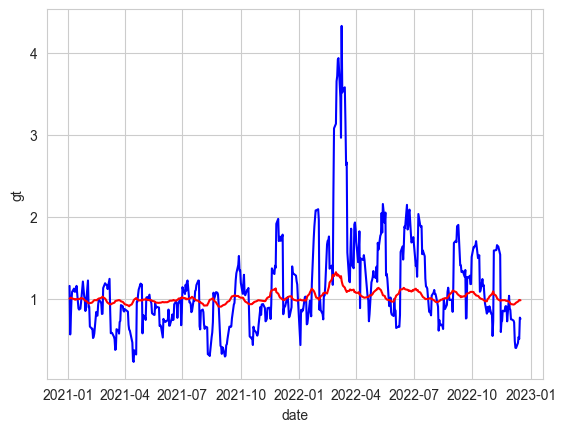

In [5]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data = df_preds, x = 'date', y = 'gt', color = 'blue', ax = ax)
sns.lineplot(data = df_preds, x = 'date', y = 'prediction', color = 'red', ax = ax)
plt.show()